<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW3Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


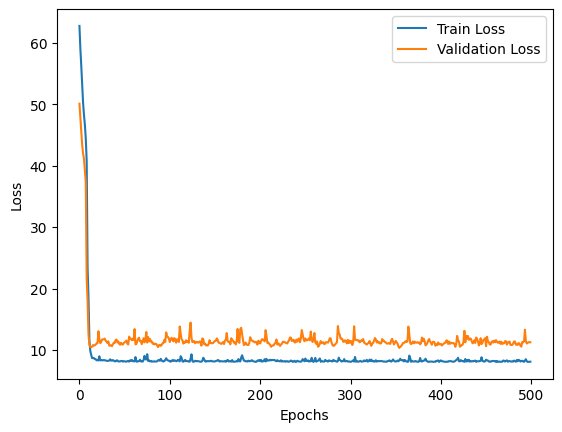

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted House Price for population of 165,000: 814342.25


In [4]:
#HW3 Question 4

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Load housing dataset
housing_data = np.loadtxt('/content/Housing_prices.txt', delimiter=',')
X = housing_data[:, 0:1]  # Population
y = housing_data[:, 1]    # Price

# Normalize data
X = (X - X.mean()) / X.std()

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Build neural network
model = keras.Sequential([
    keras.layers.Dense(2, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='mse')

# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict house price for population of 165,000
scaled_pop = (165000 - X.mean()) / X.std()
predicted_price = model.predict(np.array([[scaled_pop]]))
print(f'Predicted House Price for population of 165,000: {predicted_price[0,0]:.2f}')
